In [1]:
import logging
import os
import random
import sys
from collections import deque

sys.path.insert(0, './')

In [2]:
import tensorflow as tf
from tqdm import tqdm
import numpy as np
import tensorflow.contrib.slim as slim
from nets.mobilenet import mobilenet_v2

BATCH_SIZE = 32
IMAGE_SIZE = 224

checkpoint_name = './mobilenet_v2_1.0_224/mobilenet_v2_1.0_224.ckpt'

tf.__version__

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



'1.15.0'

In [3]:
def set_random_seed():
    seed = random.randrange(2 ** 32 - 2)
    logging.info('Using random seed {}'.format(seed))
    random.seed(seed)
    np.random.seed(seed + 1)
    tf.set_random_seed(seed + 2)
    
set_random_seed()

In [4]:
from dataset_factory import ImageCollector, ImgInverNormalize
import matplotlib.pyplot as plt

In [5]:
dataset = ImageCollector("./ARVision Data", 1, 100, 32) # Real data
dataset.StartLoadData()

module name: dataset_factory
parent process: 3564
process id: 3727


In [6]:
real_data = dataset.getLoadedData()

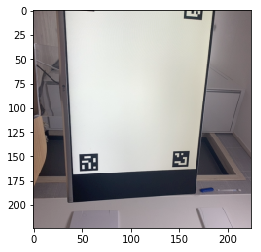

In [7]:
plt.imshow(ImgInverNormalize(real_data[1][0], 1.))
plt.show()

In [8]:
input_img = tf.placeholder(tf.float32, [BATCH_SIZE] + [IMAGE_SIZE, IMAGE_SIZE, 3])
input_label = tf.placeholder(tf.float32, [BATCH_SIZE] + [6])

In [9]:
with tf.contrib.slim.arg_scope(mobilenet_v2.training_scope(is_training=False)):
    logits, endpoints = mobilenet_v2.mobilenet(input_img, num_classes=6)

Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


In [38]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())
reuse_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="MobilenetV2")
reuse_var_refine = [var for var in reuse_vars if '6DOF' not in var.name]

saver = tf.train.Saver(var_list=reuse_var_refine)

In [41]:
with sess.as_default():
    real_data = dataset.getLoadedData()
    saver.restore(sess, checkpoint_name)
    x = endpoints['6DOF'].eval(feed_dict={input_img: real_data[1]})

INFO:tensorflow:Restoring parameters from ./mobilenet_v2_1.0_224/mobilenet_v2_1.0_224.ckpt


INFO:tensorflow:Restoring parameters from ./mobilenet_v2_1.0_224/mobilenet_v2_1.0_224.ckpt


In [42]:
x[0]

array([ 0.14417396,  0.1850594 , -0.08640437,  0.06563112, -0.14458108,
       -0.2386624 ], dtype=float32)

# Tensorflow to CoreML